In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("KaggleData/train (1).csv")
train = train.drop("Name", axis=1)
train = train.drop("Ticket", axis=1)
train = train.drop("Cabin", axis=1)
train = train.drop("PassengerId", axis=1)

#mean_age = round(train[train["Age"].isnull()==False]["Age"].mean())
mean_age = 39
print(mean_age)
train["Age"] = train["Age"].fillna(mean_age)

object_df = train.select_dtypes("object")
numeric_df = train.select_dtypes(exclude="object")
df_obj_dummies = pd.get_dummies(object_df, drop_first=True)
train = pd.concat([numeric_df, df_obj_dummies], axis=1)

test = pd.read_csv("KaggleData/test.csv")
test = test.drop("Name", axis=1)
test = test.drop("Ticket", axis=1)
test = test.drop("Cabin", axis=1)

#mean_age = round(test[test["Age"].isnull()==False]["Age"].mean())
mean_age = 34
print(mean_age)
test["Age"] = test["Age"].fillna(mean_age)
#mean_fare = round(test[test["Fare"].isnull()==False]["Fare"].mean())
mean_fare = 7.75
print(mean_fare)
test["Fare"] = test["Fare"].fillna(mean_fare)

object_df = test.select_dtypes("object")
numeric_df = test.select_dtypes(exclude="object")
df_obj_dummies = pd.get_dummies(object_df, drop_first=True)
test = pd.concat([numeric_df, df_obj_dummies], axis=1)


x_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
y_test = pd.read_csv("KaggleData/gender_submission.csv")
print(x_train)

39
34
7.75
     Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0         3  22.0      1      0   7.2500         1           0           1
1         1  38.0      1      0  71.2833         0           0           0
2         3  26.0      0      0   7.9250         0           0           1
3         1  35.0      1      0  53.1000         0           0           1
4         3  35.0      0      0   8.0500         1           0           1
..      ...   ...    ...    ...      ...       ...         ...         ...
886       2  27.0      0      0  13.0000         1           0           1
887       1  19.0      0      0  30.0000         0           0           1
888       3  39.0      1      2  23.4500         0           0           1
889       1  26.0      0      0  30.0000         1           0           0
890       3  32.0      0      0   7.7500         1           1           0

[891 rows x 8 columns]


In [144]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,34.0,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,34.0,0,0,8.0500,1,0,1


In [90]:
def percent_missing(df):
    percents =  100 * df.isnull().sum() / len(df)
    percents = percents[percents > 0]
    return percents.sort_values()
plt.figure(figsize=(20,5))
percents_nan = percent_missing(test)
sns.barplot(x=percents_nan.index, y = percents_nan)
plt.xticks(rotation=90)

ValueError: min() arg is an empty sequence

<Figure size 2000x500 with 0 Axes>

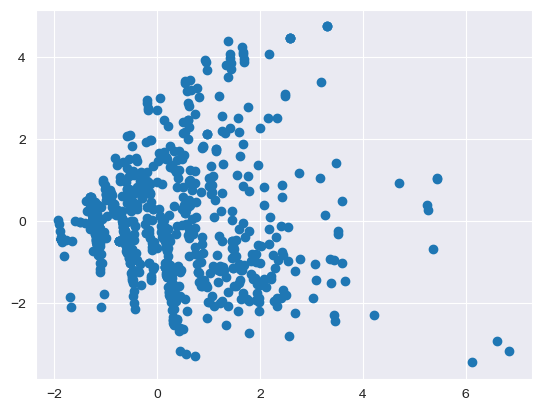

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
res = pca.fit_transform(x_train)
plt.scatter(res[:,0], res[:,1])

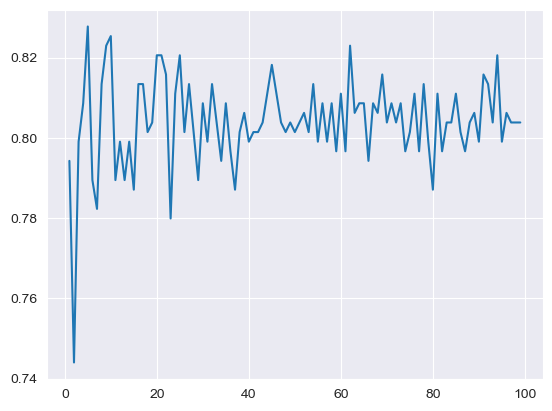

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
accs = []
for i in range(1,100):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(x_train, y_train)
    cols = test["PassengerId"]
    preds = model.predict(test.drop("PassengerId", axis=1))
    preds = pd.DataFrame(preds)
    preds["PassengerId"] = cols
    preds.columns = ["Survived","PassengerId"]
    accs.append(accuracy_score(y_test["Survived"], preds["Survived"]))
plt.plot(range(1,100), accs)

In [181]:
cols = test["PassengerId"]
preds = model.predict(test.drop("PassengerId", axis=1))
preds = pd.DataFrame(preds)
preds["PassengerId"] = cols
preds.columns = ["Survived","PassengerId"]

In [182]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test["Survived"], preds["Survived"])

0.7966507177033493

In [179]:
preds.to_csv('submission_titanic.csv', index = False)

## Some online solution

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [156]:
train_data = pd.read_csv("../input/titanic/train.csv")

,Sex,Survived
0,female,0.742038
1,male,0.188908


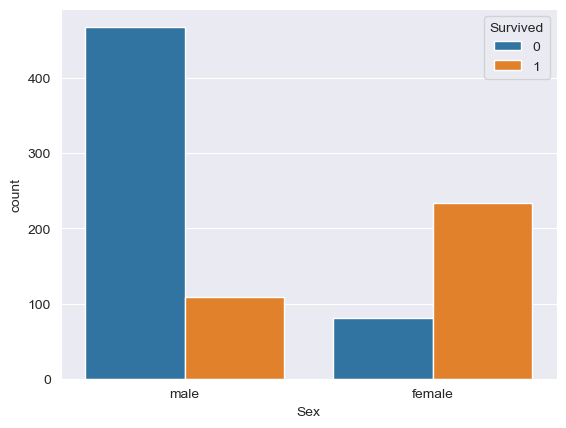

In [157]:
sns.countplot(x=train_data['Sex'], hue=train_data['Survived'])
display(train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


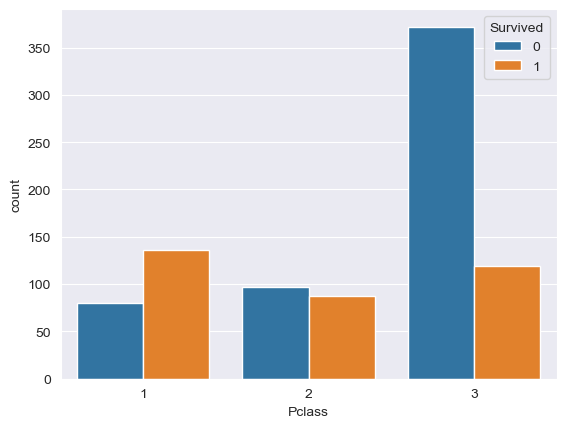

In [158]:
sns.countplot(x=train_data['Pclass'], hue=train_data['Survived'])
display(train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

In [159]:
train_data1 = train_data.drop(["PassengerId","Cabin","Name","Ticket","Parch"],axis=1)
train_data1['Embarked'] = train_data1['Embarked'].fillna('C')

In [160]:
train_data1['Sex'].replace('female', 0,inplace=True)
train_data1['Sex'].replace('male', 1,inplace=True)
train_data1['Embarked'].replace('S', 0,inplace=True)
train_data1['Embarked'].replace('C', 1,inplace=True)
train_data1['Embarked'].replace('Q', 2,inplace=True)
train_data1["Age"].fillna("39", inplace = True)
train_data1.dropna(inplace=True)
train_data1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [161]:
x_train = train_data1.drop("Survived",axis=1)
y_train = train_data1["Survived"]

In [162]:
test_data = pd.read_csv("../input/titanic/test.csv")
test_data1 = test_data.drop(["PassengerId","Cabin","Name","Ticket","Parch"],axis=1)
test_data1["Age"].fillna("34", inplace = True)
test_data1["Fare"].fillna("7.75", inplace = True)
test_data1['Sex'].replace('female', 0,inplace=True)
test_data1['Sex'].replace('male', 1,inplace=True)
test_data1['Embarked'].replace('S', 0,inplace=True)
test_data1['Embarked'].replace('C', 1,inplace=True)
test_data1['Embarked'].replace('Q', 2,inplace=True)

In [163]:
x_test = test_data1

In [164]:
log = LogisticRegression()
log.fit(x_train,y_train)
pred = log.predict(x_test)
y_test = pd.read_csv("../input/titanic/gender_submission.csv")
y_test1 = np.array(y_test["Survived"])
accuracy_score(y_test1,pred)

0.9449760765550239